In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [131]:
data = pd.read_csv("C:/Users/Tirth/Desktop/Machine_learning/machine learning/my codes/Titanic(train).csv")
test = pd.read_csv("C:/Users/Tirth/Desktop/Machine_learning/machine learning/my codes/Titanic(test).csv")

In [132]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
data.set_index('PassengerId' , inplace = True)
test.set_index('PassengerId' , inplace = True)

In [134]:
data.shape

(891, 11)

In [135]:
data.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [136]:
data = data.drop(['Cabin' , 'Age'] , axis = 1)
test = test.drop(['Cabin' , 'Age'] , axis = 1)

In [137]:
test.count()

Pclass      418
Name        418
Sex         418
SibSp       418
Parch       418
Ticket      418
Fare        417
Embarked    418
dtype: int64

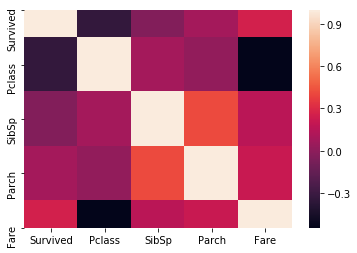

In [138]:
sns.heatmap(data.corr())

In [139]:
data['Sex'] = data.Sex.map({'male':1 , 'female':0})
test['Sex'] = test.Sex.map({'male':1 , 'female':0})
data['Embarked'] = data.Embarked.map({'S':0 , 'C':1 , 'Q':2})
test['Embarked'] = test.Embarked.map({'S':0 , 'C':1 , 'Q':2})

In [140]:
print(data.columns.values)

['Survived' 'Pclass' 'Name' 'Sex' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Embarked']


In [141]:
data = data.drop(['Name' , 'Pclass' , 'Ticket'] , axis = 1)
test = test.drop(['Name' , 'Pclass' , 'Ticket'] , axis = 1)

In [142]:
data['Embarked'].fillna(0 , inplace = True)
test['Fare'].fillna(2000 , inplace = True)

In [143]:
from sklearn.model_selection import train_test_split
y = data['Survived']
X = data.drop(['Survived'] , axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [144]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(623, 5) (268, 5) (623,) (268,)


In [145]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()

In [146]:
data.count()

Survived    891
Sex         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

In [147]:
LogReg.fit(X_train, y_train)

C:\Users\Tirth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
y_pred = LogReg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0], dtype=int64)

In [149]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[155,  21],
       [ 25,  67]], dtype=int64)

In [150]:
metrics.accuracy_score(y_test, y_pred)

0.8283582089552238

In [151]:
y_pred = LogReg.predict(test)